In [2]:
import pandas as pd

In [14]:
file_path = "all_data.csv"
df = pd.read_csv(file_path)

In [15]:
# Filter out rows with NaN values in the 'listeners' column
df = df[df['listeners'].notna()]

# Filter out rows where 'listeners' is 0
df = df[df['listeners'] != 0]

In [18]:
# Drop the unneeded columns
df = df.drop(columns=['location', 'genre', 'Country', 'Capital', 'Latitude', 'Longitude'])

# Display the updated DataFrame to verify the removal
df.head()

,track_id,track_name,artist_name,listeners,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,...,Spectral Contrast4,Spectral Contrast5,Spectral Contrast6,Spectral Contrast7,Tonnetz1,Tonnetz2,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6
0,1,Saoko,Rosalía,1357002,-77.414597,52.028152,-3.623052,26.313429,-6.456990,4.815507,...,20.280983,20.191272,19.324666,48.279600,-0.027142,-0.020731,-0.021392,0.044810,-0.007974,-0.004325
1,2,LA FAMA,Rosalía,1357002,-26.360342,58.178242,-4.188851,13.911586,-0.722250,0.516111,...,17.862197,18.651261,17.866660,47.972265,-0.027838,0.055648,-0.048578,0.023190,-0.007012,-0.008216
2,3,Spanish Caravan,The Doors,4192927,-11.511451,55.405762,7.986939,36.587006,-11.344443,9.968189,...,18.531443,18.879457,18.596964,47.135589,0.007870,0.033456,0.016028,-0.022644,0.005322,0.007948
3,4,MALAMENTE - Cap.1: Augurio,Rosalía,1357002,-101.739975,73.730225,12.624538,17.547098,-0.069537,4.388907,...,20.178878,18.790249,18.390491,46.152555,0.099873,0.030986,0.005340,0.004176,0.012629,0.004073
4,5,Chicken Teriyaki,Rosalía,1357002,-142.860245,129.822037,5.122724,23.853304,5.494754,1.273841,...,18.755897,19.067358,20.326484,45.015051,-0.060729,0.127327,0.053530,0.035377,-0.006391,0.009835


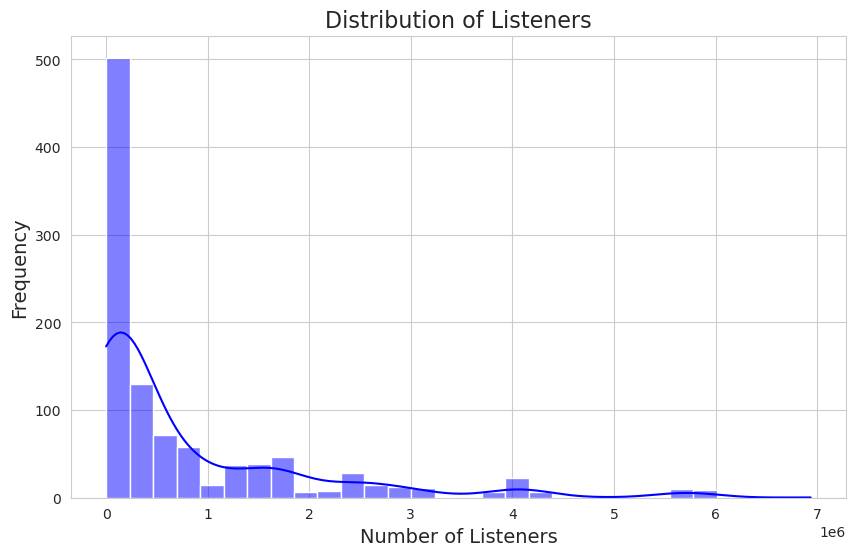

In [17]:
# Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plot
sns.set_style('whitegrid')

# Plot a histogram of the 'listeners' column
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['listeners'], bins=30, kde=True, color='blue')

# Add titles and labels
plt.title('Distribution of Listeners', fontsize=16)
plt.xlabel('Number of Listeners', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


In [20]:
low_threshold = df['listeners'].quantile(0.33)
high_threshold = df['listeners'].quantile(0.66)

# Create a new column 'category' to classify listeners
def categorize_listeners(value):
    if value <= low_threshold:
        return 'low'
    elif value <= high_threshold:
        return 'medium'
    else:
        return 'high'

df['category'] = df['listeners'].apply(categorize_listeners)

# Display the number of rows in each category
print(df['category'].value_counts())

# Print the threshold values
print(f"Low threshold (33rd percentile): {low_threshold}")
print(f"High threshold (66th percentile): {high_threshold}")

# Preview the DataFrame
df.head()

category
high      350
medium    343
low       342
Name: count, dtype: int64
Low threshold (33rd percentile): 90516.90000000002
High threshold (66th percentile): 615406.0


,track_id,track_name,artist_name,listeners,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,...,Spectral Contrast5,Spectral Contrast6,Spectral Contrast7,Tonnetz1,Tonnetz2,Tonnetz3,Tonnetz4,Tonnetz5,Tonnetz6,category
0,1,Saoko,Rosalía,1357002,-77.414597,52.028152,-3.623052,26.313429,-6.456990,4.815507,...,20.191272,19.324666,48.279600,-0.027142,-0.020731,-0.021392,0.044810,-0.007974,-0.004325,high
1,2,LA FAMA,Rosalía,1357002,-26.360342,58.178242,-4.188851,13.911586,-0.722250,0.516111,...,18.651261,17.866660,47.972265,-0.027838,0.055648,-0.048578,0.023190,-0.007012,-0.008216,high
2,3,Spanish Caravan,The Doors,4192927,-11.511451,55.405762,7.986939,36.587006,-11.344443,9.968189,...,18.879457,18.596964,47.135589,0.007870,0.033456,0.016028,-0.022644,0.005322,0.007948,high
3,4,MALAMENTE - Cap.1: Augurio,Rosalía,1357002,-101.739975,73.730225,12.624538,17.547098,-0.069537,4.388907,...,18.790249,18.390491,46.152555,0.099873,0.030986,0.005340,0.004176,0.012629,0.004073,high
4,5,Chicken Teriyaki,Rosalía,1357002,-142.860245,129.822037,5.122724,23.853304,5.494754,1.273841,...,19.067358,20.326484,45.015051,-0.060729,0.127327,0.053530,0.035377,-0.006391,0.009835,high


In [21]:
# Get the number of columns in the DataFrame
num_columns = len(df.columns)

# Print the number of columns
print(f"The dataset has {num_columns} columns.")

The dataset has 50 columns.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Select Features and Target
X = df.iloc[:, 4:48].values
y = df.iloc[:, -1].values

# Preprocessing
# Convert target (y) to categorical
y = LabelEncoder().fit_transform(y)  # Encode labels as integers
y = to_categorical(y)  # Convert labels to one-hot encoding

# Normalize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)